In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam

In [2]:
# Data directories
data_dir_train = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Train")
data_dir_test = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Test")

In [3]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9  # Update this with the number of classes in your dataset

In [4]:
# Data preprocessing and augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 1858 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 464 files for validation.


In [6]:
# Model
base_model = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

C:\Users\91939\AppData\Local\Temp\ipykernel_5640\1468658774.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


In [8]:
model = Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 36s 564ms/step - accuracy: 0.2203 - loss: 2.2977 - val_accuracy: 0.3966 - val_loss: 1.6778
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 523ms/step - accuracy: 0.3996 - loss: 1.6685 - val_accuracy: 0.4612 - val_loss: 1.5870
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 503ms/step - accuracy: 0.4497 - loss: 1.5016 - val_accuracy: 0.5237 - val_loss: 1.4845
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 516ms/step - accuracy: 0.4885 - loss: 1.4189 - val_accuracy: 0.5151 - val_loss: 1.4433
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 512ms/step - accuracy: 0.5343 - loss: 1.3625 - val_accuracy: 0.5237 - val_loss: 1.4057
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 501ms/step - accuracy: 0.5686 - loss: 1.2684 - val_accuracy: 0.5603 - val_loss: 1.3747
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 506ms/step - accuracy: 0.5851 - loss: 1.1654 - val_accuracy: 0.5517 - val_loss: 1.3527
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 500ms/step - accuracy: 0.6204 - loss: 1.1067 - val_accu

In [11]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Text(0, 0.5, 'Accuracy')

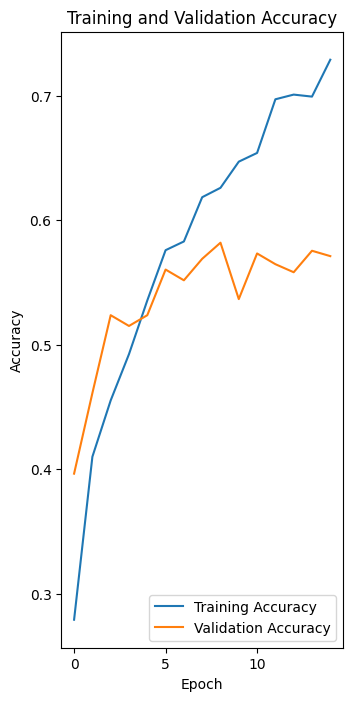

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


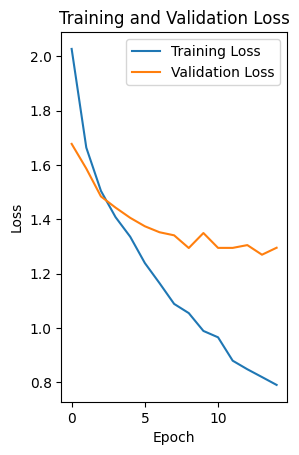

In [13]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()